In [59]:
from parsing import *
from NJ import *
import os
import time
import pandas as pd
from rfdist import *
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
executions = 'unique_distance_matrices\execution_times.csv'
our_algorithm = 'execution_times_first5.xlsx'
df = pd.read_csv(executions)
our = pd.read_excel(our_algorithm)
our['file'] = our.iteration.str.split(pat="/",expand=True)[1]
## merged results
executions = pd.merge(our,df,how='right')
executions = executions[['file','QuickTreeNJ','RapidNJ','time']]
executions = executions.rename(columns={'time':'Capi'})
executions.head()

,file,QuickTreeNJ,RapidNJ,Capi
0,1347_FAINT.phy,1.963585,0.465415,NaN
1,1493_Fe-ADH.phy,2.282779,0.531238,NaN
2,1560_Ferritin.phy,2.524688,0.543163,NaN
3,1689_FGGY_N.phy,3.411204,0.680182,NaN
4,1756_FAD_binding_3.phy,3.475785,0.855618,NaN


### Running time comparison

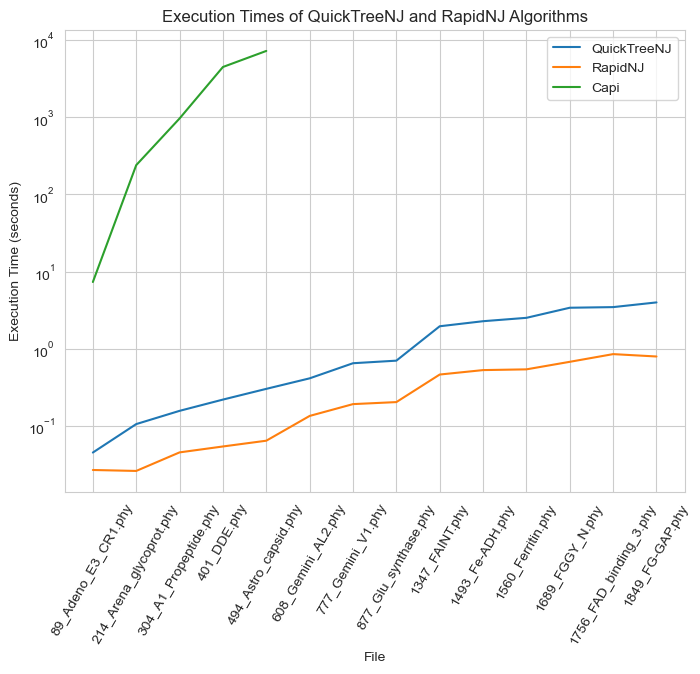

In [83]:
executions['file_num'] = executions['file'].str.extract('(\d+)').astype(int)
executions = executions.sort_values(by='file_num')

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

sns.lineplot(x='file', y='QuickTreeNJ', data=executions, sort=False, label='QuickTreeNJ')
sns.lineplot(x='file', y='RapidNJ', data=executions, sort=False, label='RapidNJ')
sns.lineplot(x='file', y='Capi', data=executions, sort=False, label='Capi')


plt.title('Execution Times of QuickTreeNJ and RapidNJ Algorithms')
plt.xlabel('File')
plt.xticks(rotation=60)
plt.ylabel('Execution Time (seconds)')
plt.yscale('log')
plt.legend()
plt.show()

#### Comparing the "speed-up"

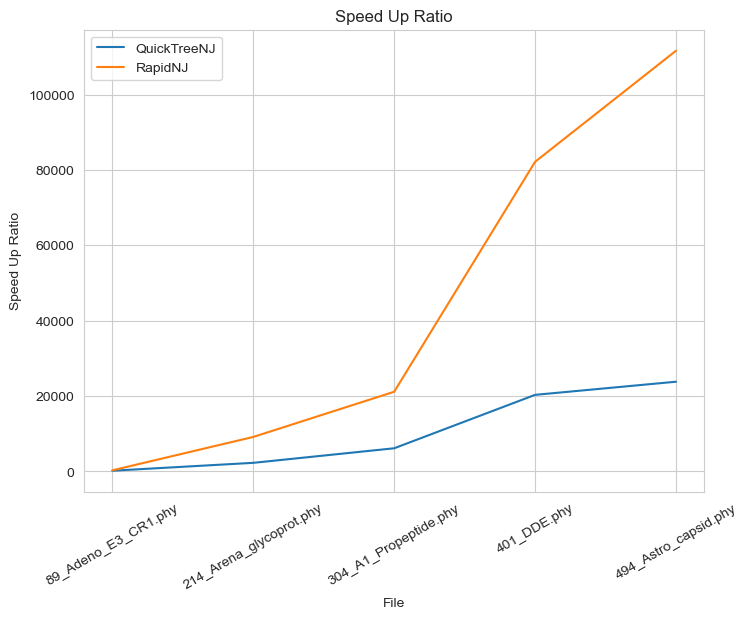

In [81]:
executions['QuickTreeNJ_speedup'] = executions['Capi'] / executions['QuickTreeNJ']
executions['RapidNJ_speedup'] = executions['Capi'] / executions['RapidNJ']


sns.set_style("whitegrid")
plt.figure(figsize=(8,6))

sns.lineplot(x='file', y='QuickTreeNJ_speedup', data=executions, sort=False, label='QuickTreeNJ')
sns.lineplot(x='file', y='RapidNJ_speedup', data=executions, sort=False, label='RapidNJ')

plt.title('Speed Up Ratio')
plt.xlabel('File')
plt.ylabel('Speed Up Ratio')
plt.xticks(rotation=30)
#plt.yscale('log')
plt.legend()
plt.show()

#### RF-distances

In [51]:
results = pd.DataFrame(columns = trees_capi.keys())
for name in os.listdir("output/capi"):
    ## get the name of the files
    capi =  "output/capi/" + name
    quicktree = "output/quicktree/" + name[:-3]+'phy.quicktree'
    rapid = "output/rapidnj/" + name[:-3]+'phy.rapidnj'

    ## get the parsed trees
    t_capi = parse_newick(capi)
    t_quicktree = parse_newick(quicktree)
    t_rapidnj = parse_newick(rapid)
    
    ## get the rf distance and add it to the df
    results.loc["Distance our implementation vs QuickTree",name] =  get_rf_distance(capi_tree,t_quicktree)
    results.loc["Distance our implementation vs RapidNJ",name] =    get_rf_distance(capi_tree,t_rapidnj)
    results.loc["Distance QuickTree vs RapidNJ",name]      =        get_rf_distance(t_quicktree,t_rapidnj)
results

,214_Arena_glycoprot.nwk,304_A1_Propeptide.nwk,401_DDE.nwk,494_Astro_capsid.nwk,89_Adeno_E3_CR1.nwk
Distance our implementation vs QuickTree,216,306,403,496,91
Distance our implementation vs RapidNJ,216,306,403,496,91
Distance QuickTree vs RapidNJ,56,80,100,532,32
